In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal

C:\Users\Jarod\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
fp = 'Shp_files/Zip_Codes.shp'

map_df = gpd.read_file(fp)
map_df.head()

,OBJECTID,ZIPNAME,ZIPNUM,ZIPCODE,NAME,SHAPEAREA,SHAPELEN,LAST_EDITE,geometry
0,14,YOUNGSVILLE,27596.0,YOUNGSVILLE 27596,YOUNGSVILLE,5.895366e+07,36862.720908,None,"POLYGON ((2185788.569720805 795376.804115817, ..."
1,15,RALEIGH,27616.0,RALEIGH 27616,RALEIGH,6.369874e+08,200568.559138,None,"POLYGON ((2124923.251776129 764611.3274791688,..."
2,16,RALEIGH,27612.0,RALEIGH 27612,RALEIGH,4.245758e+08,151746.618810,None,"POLYGON ((2077612.405012071 776688.0002584159,..."
3,17,WENDELL,27591.0,WENDELL 27591,WENDELL,1.324757e+09,257124.620339,2018-01-22T13:29:24.000Z,"POLYGON ((2204915.446666628 742273.3280983716,..."
4,18,RALEIGH,27609.0,RALEIGH 27609,RALEIGH,3.037805e+08,101063.786786,None,"POLYGON ((2101516.987946332 755795.6392789632,..."


In [3]:
len(map_df)

62

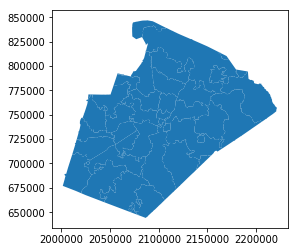

In [4]:
map_df.plot();

In [11]:
df = pd.read_csv("Source_files/Zip_counts.csv", header=0, low_memory=False)

df.head()

,ZIPNUM,Total_Count,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,27278,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27501,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27511,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27513,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27514,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:

len(df)

44

In [13]:
merged = pd.merge(map_df,df, on='ZIPNUM', how='left')

merged.head()

,OBJECTID,ZIPNAME,ZIPNUM,ZIPCODE,NAME,SHAPEAREA,SHAPELEN,LAST_EDITE,geometry,Total_Count,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,14,YOUNGSVILLE,27596.0,YOUNGSVILLE 27596,YOUNGSVILLE,5.895366e+07,36862.720908,None,"POLYGON ((2185788.569720805 795376.804115817, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,RALEIGH,27616.0,RALEIGH 27616,RALEIGH,6.369874e+08,200568.559138,None,"POLYGON ((2124923.251776129 764611.3274791688,...",73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,RALEIGH,27612.0,RALEIGH 27612,RALEIGH,4.245758e+08,151746.618810,None,"POLYGON ((2077612.405012071 776688.0002584159,...",76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,WENDELL,27591.0,WENDELL 27591,WENDELL,1.324757e+09,257124.620339,2018-01-22T13:29:24.000Z,"POLYGON ((2204915.446666628 742273.3280983716,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,RALEIGH,27609.0,RALEIGH 27609,RALEIGH,3.037805e+08,101063.786786,None,"POLYGON ((2101516.987946332 755795.6392789632,...",3388.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
merged['Total_Count'].fillna(0, inplace=True)
merged.head()

,OBJECTID,ZIPNAME,ZIPNUM,ZIPCODE,NAME,SHAPEAREA,SHAPELEN,LAST_EDITE,geometry,Total_Count,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,14,YOUNGSVILLE,27596.0,YOUNGSVILLE 27596,YOUNGSVILLE,5.895366e+07,36862.720908,None,"POLYGON ((2185788.569720805 795376.804115817, ...",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,RALEIGH,27616.0,RALEIGH 27616,RALEIGH,6.369874e+08,200568.559138,None,"POLYGON ((2124923.251776129 764611.3274791688,...",73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,RALEIGH,27612.0,RALEIGH 27612,RALEIGH,4.245758e+08,151746.618810,None,"POLYGON ((2077612.405012071 776688.0002584159,...",76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,WENDELL,27591.0,WENDELL 27591,WENDELL,1.324757e+09,257124.620339,2018-01-22T13:29:24.000Z,"POLYGON ((2204915.446666628 742273.3280983716,...",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,RALEIGH,27609.0,RALEIGH 27609,RALEIGH,3.037805e+08,101063.786786,None,"POLYGON ((2101516.987946332 755795.6392789632,...",3388.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
len(merged)

62

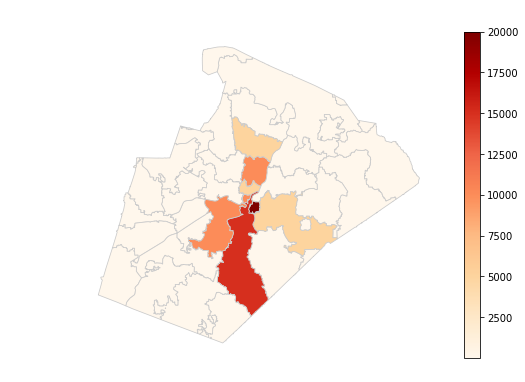

In [56]:
vmin, vmax = 1, 20000

# create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(10, 6))

ax.axis('off')

c = "white"

ax.set_title('Fire Incident Rate in Wake County',color=c, fontdict={'fontsize': '25', 'fontweight' : '3'})

ax.annotate('2008-2018',
            xy=(0.15, .125), xycoords='figure fraction',
            horizontalalignment='left',color=c, verticalalignment='top',
            fontsize=15, fontweight=1)

merged.plot(column='Total_Count',cmap='OrRd',scheme='fisher_jenks',ax=ax, linewidth=0.8, edgecolor='0.8')

sm = plt.cm.ScalarMappable( cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm.set_label(color = 'white')
sm._A = []

cbar = fig.colorbar(sm)

fig.savefig("Fire_Incidents_in_Wake_County.png", dpi=300, transparent=True)